# 🧑‍🎓 Student Activity: Gradient Descent and Neural Networks

In this activity, you'll explore how gradient descent works and apply it to train a simple neural network. Your goal is to complete, run, and reflect on the following tasks.

**Objectives:**
- Understand and visualize gradient descent
- Implement a simple linear regression model from scratch
- Train a neural network using TensorFlow and PyTorch
- Compare performance between the two frameworks

## 📉 Part 1: Gradient Descent
Use gradient descent to fit a line to the synthetic data below.

In [4]:
%pip install numpy
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl.metadata (8.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 5.4 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 5.3 MB/s eta 0:00:00a 0:00:01
Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 5.3 MB/s eta 0:00:00a 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
Using cached python_dateutil-2.9.0.post0-py2.py3-none-any.whl (229 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [matplotlib]8 [matplotlib]
Note: you may need to restart the kernel to use updated p

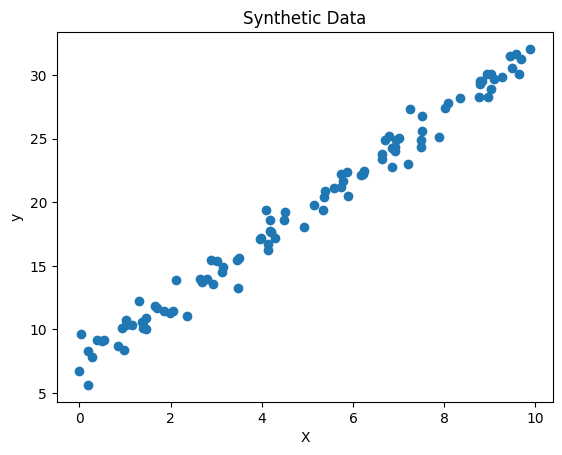

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
X = np.random.rand(100, 1) * 10
y = 2.5 * X + 7 + np.random.randn(*X.shape)

plt.scatter(X, y)
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [2]:
# TODO: Complete gradient descent logic
w, b = 0.0, 0.0
learning_rate = 0.01
losses = []

for epoch in range(50):
    y_pred = w * X + b
    error = y_pred - y
    loss = (error ** 2).mean()
    losses.append(loss)

    # Compute gradients
    dw = (2 * (error * X).mean())
    db = (2 * error.mean())

    # Update parameters
    w -= learning_rate * dw
    b -= learning_rate * db

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 423.4375
Epoch 10: Loss = 11.6771
Epoch 20: Loss = 10.5900
Epoch 30: Loss = 9.6115
Epoch 40: Loss = 8.7309


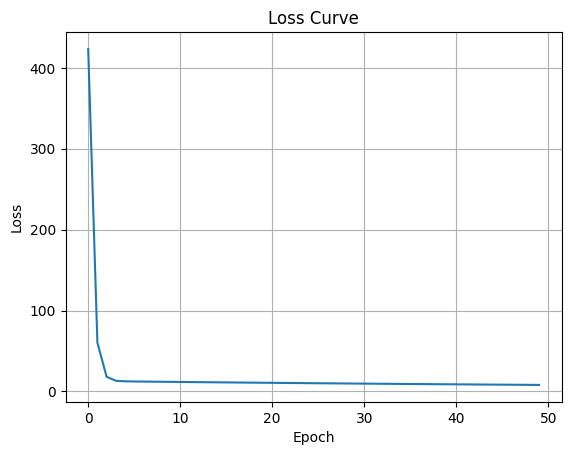

In [3]:
plt.plot(losses)
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

In [5]:
# TODO: Complete the TensorFlow model
%pip install -q "tensorflow<2.16" "numpy<1.24"
import tensorflow as tf
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Generate and preprocess data
X, y = make_moons(n_samples=500, noise=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_tf.fit(X_train, y_train, epochs=20, verbose=1, validation_data=(X_test, y_test))


Note: you may need to restart the kernel to use updated packages.
Epoch 1/20
11/11 [==============================] - 0s 5ms/step - loss: 0.6356 - accuracy: 0.6571 - val_loss: 0.6182 - val_accuracy: 0.7400
Epoch 2/20
11/11 [==============================] - 0s 1ms/step - loss: 0.6137 - accuracy: 0.7686 - val_loss: 0.5992 - val_accuracy: 0.7733
Epoch 3/20
11/11 [==============================] - 0s 1ms/step - loss: 0.5944 - accuracy: 0.8029 - val_loss: 0.5807 - val_accuracy: 0.7867
Epoch 4/20
11/11 [==============================] - 0s 1ms/step - loss: 0.5756 - accuracy: 0.8114 - val_loss: 0.5633 - val_accuracy: 0.8067
Epoch 5/20
11/11 [==============================] - 0s 1ms/step - loss: 0.5572 - accuracy: 0.8229 - val_loss: 0.5470 - val_accuracy: 0.8000
Epoch 6/20
11/11 [==============================] - 0s 1ms/step - loss: 0.5397 - accuracy: 0.8343 - val_loss: 0.5311 - val_accuracy: 0.8133
Epoch 7/20
11/11 [==============================] - 0s 1ms/step - loss: 0.5226 - accuracy: 0.8

In [6]:
# TODO: Complete the PyTorch model
%pip install "torch" "torchvision"
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert data to tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Prepare DataLoader
train_ds = TensorDataset(X_train_tensor, y_train_tensor)
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)

# Define model
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 10),
            nn.ReLU(),
            nn.Linear(10, 5),
            nn.ReLU(),
            nn.Linear(5, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model = SimpleNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train model
for epoch in range(20):
    for xb, yb in train_dl:
        preds = model(xb)
        loss = criterion(preds, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")


Note: you may need to restart the kernel to use updated packages.
Epoch 1, Loss: 0.6436
Epoch 2, Loss: 0.5091
Epoch 3, Loss: 0.3504
Epoch 4, Loss: 0.1942
Epoch 5, Loss: 0.3982
Epoch 6, Loss: 0.4784
Epoch 7, Loss: 0.2510
Epoch 8, Loss: 0.3300
Epoch 9, Loss: 0.2688
Epoch 10, Loss: 0.2501
Epoch 11, Loss: 0.1754
Epoch 12, Loss: 0.1969
Epoch 13, Loss: 0.1153
Epoch 14, Loss: 0.1323
Epoch 15, Loss: 0.2845
Epoch 16, Loss: 0.1502
Epoch 17, Loss: 0.1444
Epoch 18, Loss: 0.1789
Epoch 19, Loss: 0.0666
Epoch 20, Loss: 0.1281


## 🔍 Reflection Questions
1. How does gradient descent help minimize the error in both linear regression and neural networks?
    - Gradient descent minimizes errors by iteratively changing weights and biases and then measuring whether those changes improved the results.
2. Compare the loss curve for gradient descent to the training logs from TensorFlow and PyTorch.
    - The loss curve rapidly improved for the first 10 epochs and then the marginal improvement leveled off quite a bit. TensorFlow had similar results in that it kept improving over each epoch. PyTorch on the other hand was much more sporatic; it improved for a bit, then regressed, but ultimately resulted in a lower loss score.
3. Which framework (TensorFlow or PyTorch) did you find easier to work with and why?
    - TensorFlow's code seems a little simpler though I like the more Object Oriented method of PyTorch. I believe PyTorch is more popular so may be worth the effort of learning.
4. How might increasing the number of epochs or adjusting the learning rate affect results?
    - The trade off of adjusting the epochs or the learning rate is increased training time for possibly better results. An alternative to manually adjusting these values is setting a "patience" value which tells the model to stop training after a set number of epochs if it stops improving. Another factor in settings epochs and learning rate is business criticality; if your model is classifying images of dogs and cats, a quicker training time is probably fine whereas if your model is finding cancerous growths in x-ray images, you would want to invest the training time by increasing the epochs and decreasing the learning rate or possibly setting a high patience value.